<div class="alert alert-info"><big><b>Комментарий ревьюера</b></big><br>Привет! 👋<br><br> Ничего не поменялось, меня всё ещё зовут Дмитрий Кирсанов. <br><br>Комментарии всё ещё обозначены пометкой <b>Комментарий ревьюера</b> и всё ещё содержат описание <br><span class="alert-success">✔️ хорошего, 👍 отличного, 📝 советов</span>,&nbsp;&nbsp;<span class="alert-warning">📌 важного, ⚠️ замечаний, 💡 рекомендаций</span>,&nbsp;&nbsp;<span class="alert-danger">🔧 доработок, 🚫 ошибок или 👀 вопросов.</span><br><br>После того, как замечание будет устранено, я сменю красный цвет на жёлтый, чтобы тебе было удобнее выделять те места, которые требуют доработки. Код, которым я предлагаю выделять твои комментарии:<br><code>&lt;div class=&quot;alert btn-primary&quot;&gt;&lt;b&gt;Комментарий студента:&lt;/b&gt;&lt;br&gt;   Ок   &lt;/div&gt;</code><br>Всё ещё просьба задавать вопросы и описывать изменения в проект.</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;✔️<br>
Уже сильно лучше, видно движение в верном направлении, но есть некоторые критичные ошибки, которые нужно исправить.
</div>

# Итоговый проект "Банки — Анализ оттока клиентов"

Ссылка на презентацию: <a src='https://disk.yandex.ru/i/DpkTnB7vZhM9GA'>https://disk.yandex.ru/i/DpkTnB7vZhM9GA</a>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Формат pdf, есть дата, в начале указаны цели, соблюдён баланс графической и текстовой информации, слайды по ключевым моментам работы:

* есть портрет клиентов
* есть оценка важности показателей по ML модели
* есть выводы 
</div><div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
На первом слайде портрет отточных клиентов дан очень мелко и также отточные интервалы (названные "Сегменты отечных клиентов") даны мелко — их нужно как минимум выделить на отдельный слайд.
    
В общих выводах не указано, в каких сочетаниях (сегментах) на какие признаки отточности стоит обращать внимание.
    
Нет автора, на работу сложнее будет сослаться. Нет результатов корреляционного анализа, нет обоснования выбранных отточных интервалов в виде диаграммы по показателям в разрезе оттока (количественные показатели) или по уровню оттока (категориальные показатели).
</div><div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🚫<br>
В презентацию попали ненормированные гистограммы, связанные с ними тезисы описывают отточных клиентов, а не соотношение отточных и неотточных (превышение уровня оттока над среднебанковским или нормированной плотности вероятности распределения отточных над неотточными).
</div>

### Задача:

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверьте статистические гипотезы
- Подвести промежуточный итог о том, какие показатели стратегически влияют на отток
- Сделать выводы и рекомендации (конкретные, по конкретным сегментам) для заказчика

    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*

    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*


(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `equity` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Last_activity` — активный клиент,
- `est_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

In [1]:
!pip install shap

In [2]:
!pip install phik

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import phik

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from catboost import Pool


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br><s>
Я заметил что первая ячейка имеет номер выполнения, отличный от <tt>[1]</tt>. Это может приводить к тому, что не вызовут ошибку какие-то изменения кода, которые вызвали бы ошибку после перезапуска ноутбука (или при его запуске на другой машине), например потому, что в памяти сохраняются переменные, которые были сформированы до того, как код был изменён. Поэтому важно выполнять ячейки с первой по последнюю строго последовательным образом перед тем, как отправлять их кому-то.
    
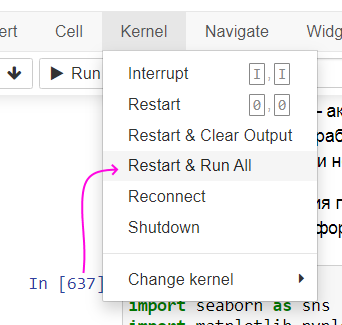
</div><div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Хорошо, что в начале работы помещаешь описание проекта, это позволит читателям быстро понять, о чём работа. 

Импорт библиотек в самом начале позволит быстро понять, какое окружение нужно для ноутбука. Такой код проще поддерживать.

Если ты не используешь потом какие-то библиотеки или методы, их импорт можно закомментировать. Если передумаешь, то сможешь убрать пометки комментирования и всё снова заработает. 

<a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>Материал по импорту.</a> Также есть простые правила — не стоит импортировать дважды одно и то же, желательно разбивать импорт на группы (отделять друг от друга переносами строк и комментариями), при этом импорт <a href='https://docs.python.org/3/library/index.html'>стандартных библиотек</a> стоит размещать в начале.
</div>

## Шаг 1. Загрузка данных и подготовка к исследованию

In [4]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df = pd.read_csv(path)

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Можно загружать файлы, заранее проверяя методами <tt>os.path.isfile</tt> или <tt>os.path.exists</tt> существование файла. Для путей в интернете этот метод не годится.

При использовании конструкции try-except важно «отлавливать» конкретный вид ошибки, возникновение которой ты ожидаешь. Название ошибки обычно написано с заглавной буквы красным цветом в конце сообщения об ошибке. Немного <a href='https://tonais.ru/file/oshibka-filenotfounderror-python'>подробнее</a> об этом.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>Я давал код:

    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    df = pd.read_csv(path)
    
примени его, он будет работать
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

In [5]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Вывод: из данных видно, что есть пропуски в столбце: balance. Столбцы приведены к правильным типам данных.

<div class="alert alert-success" style="font-size:200%; font-weight: bold;">✔️</div>

## Шаг 2. Подготовка данных (анализ пропусков) и их кодирование

### 2.1 Привести название столбцов к строчному регистру

In [7]:
df.columns = [i.lower() for i in df.columns]
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Удобно без циклов пользоваться векторными версиями функций через <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html'>строковый ацессор</a> pandas

Стоит также не забывать, что у него есть другие полезные методы
</div>

### 2.2 Проверить на пропуски данных и решить что с пропусками делать

In [8]:
df['balance'].head()

0      59214.82
1     850594.33
2           NaN
3    1524746.26
4        174.00
Name: balance, dtype: float64

In [9]:
len(df[df['balance'].isna()])

2295

In [10]:
len(df[df['balance'].isna()])/len(df)

0.2295

Вывод: из полученных данных видим, что пропуски в столбце составляют 23%

In [11]:
df[df['balance'].isna()].head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41,0,NaN,1,1,0,115117.10,0


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Результатом <tt>df['balance'].isna()</tt> уже является массив булевых значений, не нужно проверять равенство с <tt>True</tt>. Обратить булевы значения можно так: <tt>~df['balance'].isna()</tt>
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

In [12]:
len(df[(df['balance'].isna()) & (df['churn'] == 1)])

13

In [13]:
len(df[(df['balance'].isna()) & (df['churn'] == 0)])

2282

In [14]:
len(df[df['balance'] == 0])

2

In [15]:
len(df[(df['balance'].isna()) & (df['credit_card'] == 1)])

1872

In [16]:
len(df[(df['balance'].isna()) & (df['credit_card'] == 0)])

423

In [17]:
len(df[(df['balance'].isna()) & (df['credit_card'] == 0)])/ len(df)

0.0423

Вывод: из данных видно, что почти все клиенты с пропусками остаются клиентами банка (только 13 человек ушли). Стоит отметить, что если посмотреть кол-во клиентов со значением на балансе 0, то можно увидеть, что таких всего 2. Можно предположить что пропуски вызваны тем, что клиненты не имеют средств на счете (возможно даже не пополняли), такое может быть если допустим карты раздавалить и оформлялись на клиентов качетсве промоакции. Клиентов с кредитнами картами оказалось подовляющее большинство из данной когорты. Пропуски клиентов без кредитных карт составляют всего 4%. Данные пропуски относятся к группе MNAR. Значение NaN относиться к типу float и можно не менять данное значение на 0.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Выводы правильные на имеющемся материале, однако можно провести более подробное исследование:
</div>

balance,Есть пропуски,Нет пропусков,%
equity,0.05,3.40,-65.60
churn,0.01,0.23,-40.45
products,1.16,2.09,-0.80
age,41.85,43.13,-0.03
score,865.35,843.74,0.02
last_activity,0.55,0.52,0.06
credit_card,0.82,0.64,0.22
est_salary,226_310.21,124_501.87,0.45
balance,nan,827_794.31,nan


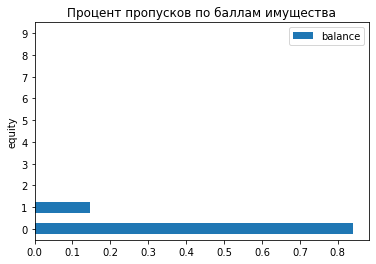

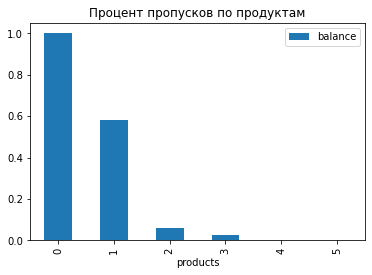

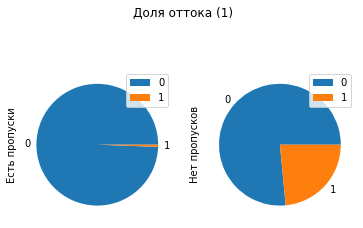

In [18]:
### КОД РЕВЬЮЕРА
USERID = "userid"
df_nan_mean = df.groupby(df.balance.isna().map({False:"Нет пропусков",True:"Есть пропуски"}))\
      .mean().T.drop(USERID)
df_nan_mean['%'] = 1-df_nan_mean["Нет пропусков"]/df_nan_mean["Есть пропуски"]
display(df_nan_mean.sort_values('%').style.format("{:_.2f}"))

df.groupby('equity').agg({"balance":lambda series:series.isna().mean()})\
  .plot(kind="barh").set(title="Процент пропусков по баллам имущества")

df.groupby('products').agg({"balance":lambda series:series.isna().mean()})\
  .plot(kind="bar").set(title="Процент пропусков по продуктам")

df.assign(balance_na = df.balance.isna().map({False:"Нет пропусков",True:"Есть пропуски"}))\
  .pivot_table(index='churn',columns="balance_na",values=USERID,aggfunc="count")\
  .plot.pie(subplots=True, title="Доля оттока (1)");

### добавить столбец наличие заработной карты (если зарплата больше 0, то заработная карта есть, иначе - нет)

In [19]:
df[df['est_salary'] > 0].head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [20]:
len(df[df['est_salary'] > 0])

10000

Вывод: на основе полученных данных видно, что у всех в бд указана зарплата, скорее всего тут указана зарплата на основании информации клиентов или банка о их зарплата, не зависимо является клиент пользователем зарплаьного проекта в данном банке. На основе данным нельзя определить принадлежность клиента к зарплатному проекту в банке.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

## Шаг 3. Исследовательский анализ данных (распределения, в т.ч. в разрезе оттока; портреты клиентов и их сравнение; корреляционный анализ)

### Распределения, в т.ч. в разрезе оттока; портреты клиентов и их сравнение

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Ниже в этом подразделе ты смотришь только корреляцию. Это нормально, её можно смотреть первой, но это надо отразить в заголовке, потом хорошо построить бокслоты просто по показателям (поискать выбросы, но не выкидывать VIP-клиентов) и <b>сравнить средние по показателям</b> (на сколько процентов выше средняя зарплата / баланс / доля активных и т.п. у отточных по сравнению с неотточными) и потом обязательно <b>построить гистограммы или kde-графики в разрезе оттока по количественным показателям</b> с большим количеством уникальных значений. Так можно выполнить заявленное в заголовке.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Над графиками надо ещё работать и они должны быть по всем переменным, включая зарплату и баланс. По городам ниже есть график, но никаких выводов из него, кажется, сделать нельзя. Вот из таблицы с уровнями оттока можно, но в презентации она будет менее красиво смотреться.
</div>

проверить как влияет Возраст/баллы кредитного скоринга/заработная плата клиента на: кол-во объектов недвижимости, баланс счете, кол-во продуктов которыми пользуется клиент, наличие кредитной карты


In [21]:
df = df.join(pd.get_dummies(df.city))
df = df.join(pd.get_dummies(df.gender))
df.corr()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
userid,1.000000,0.009804,0.017890,0.004599,0.006133,-0.005683,0.005674,-0.031029,-0.000369,-0.012398,-0.032876,0.011240,0.013308,-0.030591,0.030591
score,0.009804,1.000000,-0.012164,0.064126,0.235812,-0.004981,-0.094732,-0.031179,0.163866,0.106129,-0.037364,-0.001101,0.027598,-0.012693,0.012693
age,0.017890,-0.012164,1.000000,0.032934,0.071599,0.031810,-0.131441,-0.004164,-0.043305,-0.055798,0.047661,0.034599,-0.065043,0.225071,-0.225071
equity,0.004599,0.064126,0.032934,1.000000,0.164126,0.430203,-0.167506,-0.001970,-0.171974,0.270672,0.036174,-0.002775,-0.023266,0.021610,-0.021610
balance,0.006133,0.235812,0.071599,0.164126,1.000000,0.073024,-0.059253,0.025004,0.339622,0.085442,-0.035944,-0.034597,0.057381,-0.052288,0.052288
products,-0.005683,-0.004981,0.031810,0.430203,0.073024,1.000000,-0.256392,0.040071,-0.119738,0.297110,-0.005654,-0.043195,0.042856,0.023376,-0.023376
credit_card,0.005674,-0.094732,-0.131441,-0.167506,-0.059253,-0.256392,1.000000,-0.033445,0.035556,-0.131491,-0.099607,-0.049439,0.115376,-0.126332,0.126332
last_activity,-0.031029,-0.031179,-0.004164,-0.001970,0.025004,0.040071,-0.033445,1.000000,0.003039,0.169190,0.006788,0.048431,-0.048370,0.013090,-0.013090
est_salary,-0.000369,0.163866,-0.043305,-0.171974,0.339622,-0.119738,0.035556,0.003039,1.000000,0.001128,-0.106669,-0.058504,0.128554,-0.082508,0.082508
churn,-0.012398,0.106129,-0.055798,0.270672,0.085442,0.297110,-0.131491,0.169190,0.001128,1.000000,0.006120,-0.031179,0.023669,-0.140692,0.140692


<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Нам не нужны не оформленные таблицы (без индекса и колонок) без каких-либо выводов.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Нужно добавить в эту матрицу пол и города <s>(корректным образом, как я указывал в декомпозиции)</s>.
</div>


<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Честно не нашел информацию в декомпозиции. Именно в матрицу корреляций не получилось добавить, нашел информацию как строить кросс таблицы по категориальным данным, а так же выисление корриляции при помощи библиотеки scipy.stats. При помощи pointbiserialr не получилось связать категориальные данные и количественные, ошибка с типами данных   </div>


<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
Если ты не нашёл чего-то, о чём я говорил — это повод мне написать в чат, спросить. Я обычно всегда пишу этот комментарий (ниже) но тебе не написал, мой фейл.
    
<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Категориальные данные <a href='https://discover6sigma.org/post/2011/06/desc-stats/'>делятся на</a> упорядоченные (уровень образования, удовлетворённости пользователя) и неупорядоченные (город, брачный статус и т.п.). Центральные тенденции второго можно смотреть при помощи моды. Будет некорректно задавать неупорядоченным категориям какой-то числовой порядок и смотреть средние арифметические. К средним каких-то ординальных показателей, или численных показателей, содержащих большое число значений, например возраста, надо относиться так, что это центр распределения, которое может иметь какую-то сложную природу. Бинарные показатели, если к ним применить среднее, показывают нам долю тех клиентов, у которых этот бинарный показатель равен единице.

Уже на этапе подготовки данных важно закодировать данные численно. Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить <a href='https://habr.com/ru/post/666234/'>one-hot кодирование</a>, проще всего это сделать при помощи <tt>pandas.get_dummies</tt>. Чтобы при этом не потерять оригинальный столбец, стоит сделать его копию и использовать параметр <tt>columns</tt> (чтобы перекодированию подвергся или подверглись только те столбцы, которые нам нужно перекодировать).</div>
    
Соответственно тут нужно было сделать что-то вроде 
    
    df.join(pd.get_dummies(df.city))
</div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Если с кодировкой городов могут возникнуть вопросы, то с кодировкой пола вопросов не должно было быть.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

Колонку возраст разобьем на 10 равных частей, для того чтобы проследить какой диапазон как влияет на отток.

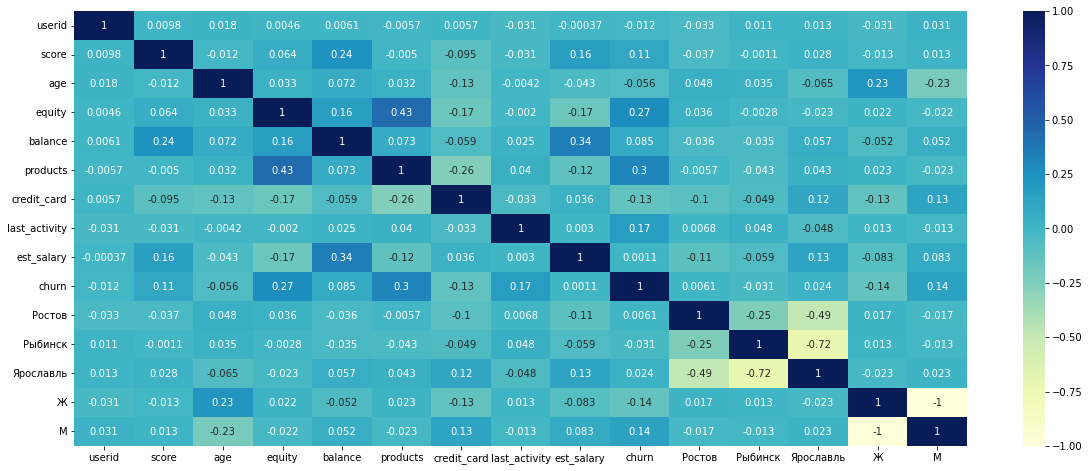

In [22]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
Опишем имеющиеся корреляции с оттоком по шкале Чеддока:
- user_id - нет корреляции.
- score - кор. слабая.
- age - нет коррелиции
- equity - кор. слабая
- balance - нет корреляции.
- products - кор. умеренная
- credit_card - кор. слабая
- last_activity - кор. слабая
- est_salary - нет корреляции
- Ростов - нет корреляции
- Рыбинск - нет корреляции
- Ярославль - нет корреляции
- Мужчины - кор. слабая

из полученных данных видно, что взаимосвясь присутвует только в:
- кол-во продуктов и кол-во объектов недвижимости
- кол-во кредитного скоринга и уровень активности
- наличие кредитной карты и мужской пол.

Далее рассмотрим подробнее: score, equity, products, credit_card, last_activity, M

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Графики в этом разделе будет удобно строить в цикле. Но для некоторых надо будет задать plt.xlim
</div>

### Быллы  score

<AxesSubplot:>

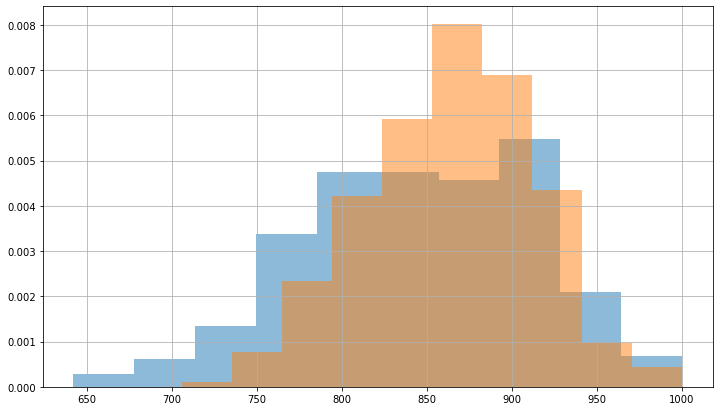

In [23]:
plt.figure(figsize=(12,7))
df[df['churn'] == 0]['score'].hist(bins=10, density=True, alpha=0.5)
df[df['churn'] == 1]['score'].hist(bins=10, density=True, alpha=0.5)

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Пожалуйста, используй гистограммы или kde-графики. Скор ещё можно так изобразить, пусть это и шумно, но выводы у тебя не получилось сделать. А тут есть чёткий интервал повышенной отточности. Так имело смысл уровень оттока изображать, но перед этим нужно самому делать "корзины", т.е. объединять данные нескольких соседних значений, либо скользящее среднее применять для сглаживания шума.
    
<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>   
По обычным гистограммам или sns.countplot графикам можно делать выводы, но из-за необходимости делать поправки на разные размеры групп в уме, точных выводов по ним не сделаешь. Нивелировать разницы в размерах групп можно если применить <tt>sns.kdeplot</tt> или <tt>sns.histplot</tt> с параметрами <tt>hue</tt> и настройками <tt>stat="density", common_norm=False</tt> (для kdeplot stat="density" не нужно, common_norm=False нужно именно при использовании hue). При использовании plt.hist и основанных на нём методах pandas достаточно установить параметр <tt>density=True</tt>, также понадобится установить прозрачность (цвета лучше подобрать так, чтобы было меньше затруднений от того, что они смешаются). Обращаю внимание, что метод <tt>sns.dis<b>t</b>plot</tt> является устаревшим и его нежелательно использовать.

В px.histogram, если хочется использовать именно эту библиотеку, можно установить параметры <tt>histnorm='probability',barmode ='overlay'</tt>.

Также даже для выводимых циклом графиков можно задавать конкретное чёткое число корзин либо размеры корзин, чтобы не появлялось для бинарных признаков корзин "от 0.4 до 0.6" или подобных.
    
Если почему-то этот подход не подходит, то можно делать сводные таблицы pivot_table и из них столбиковые диаграммы.
</div>
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

In [24]:
df_score_0 = df[df['churn'] == 0].groupby('score')['churn'].count().reset_index()
df_score_1 = df[df['churn'] == 1].groupby('score')['churn'].count().reset_index()

In [25]:
print('неотточные', df_score_0['score'].mean())
print('отточные', df_score_1['score'].mean())
print(df_score_1['score'].mean() / df_score_0['score'].mean() - 1)

неотточные 825.9310344827586
отточные 859.119341563786
0.040182903529967895


Вывод: из полученных данных видно, что отточные клиенты имеют былла от 825 до 925

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

<AxesSubplot:xlabel='churn', ylabel='score'>

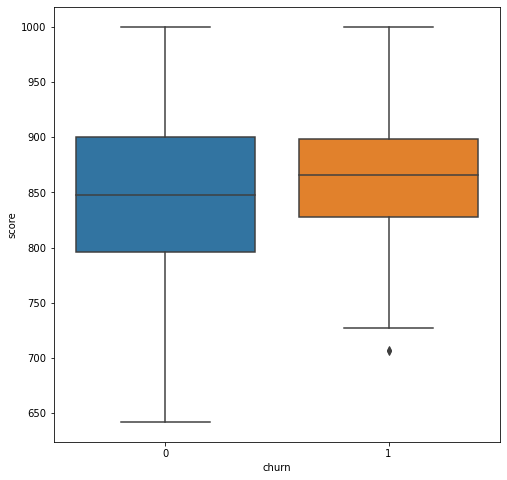

In [26]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['churn'], y=df['score'])

In [27]:
df_score_0['score'].describe()

count     348.000000
mean      825.931034
std       101.527787
min       642.000000
25%       739.750000
50%       826.500000
75%       913.250000
max      1000.000000
Name: score, dtype: float64

In [28]:
df_score_1['score'].describe()

count     243.000000
mean      859.119342
std        73.087165
min       706.000000
25%       798.500000
50%       859.000000
75%       919.500000
max      1000.000000
Name: score, dtype: float64

Вывод: из полученных данных видно, что у отточных клиентов диапазон кредитного скоринга меньше и сосредоточен в верхней части.
У отточных клиентов есть выбрасы в районе около 700.

### Объекты в собственности (equity)

<AxesSubplot:>

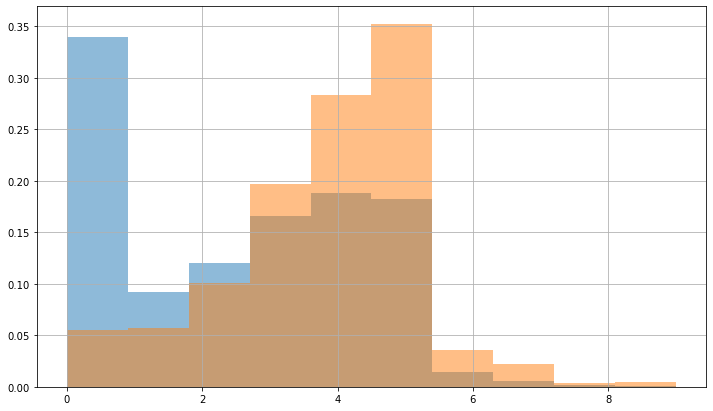

In [29]:
plt.figure(figsize=(12,7))
df[df['churn'] == 0]['equity'].hist(bins=10, density=True, alpha=0.5)
df[df['churn'] == 1]['equity'].hist(bins=10, density=True, alpha=0.5)

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Хитмап, который ты ниже делаешь даёт лучшее представление о ситуации.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

<AxesSubplot:xlabel='churn', ylabel='equity'>

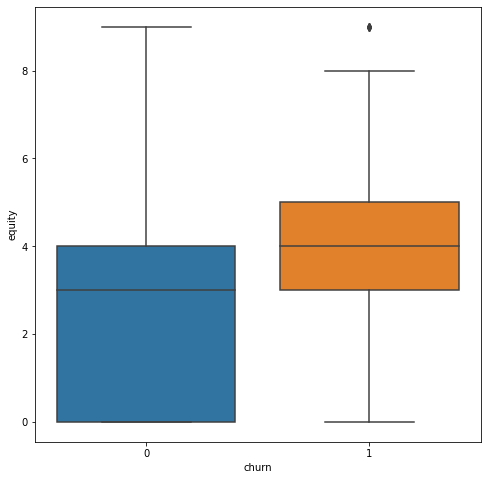

In [30]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['churn'], y=df['equity'])

Вывод: из полученных данных видно(на гистограмме), что отток клиентов увеличивается с 3-объектов. Отточным интервалом будет считать выше 3-х

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Тут нужно решить, будешь ли ты считать отточным интервалом от 3х до 5 или выше 4х объектов.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

### Кол-во продуктов (products)

<AxesSubplot:xlabel='churn', ylabel='products'>

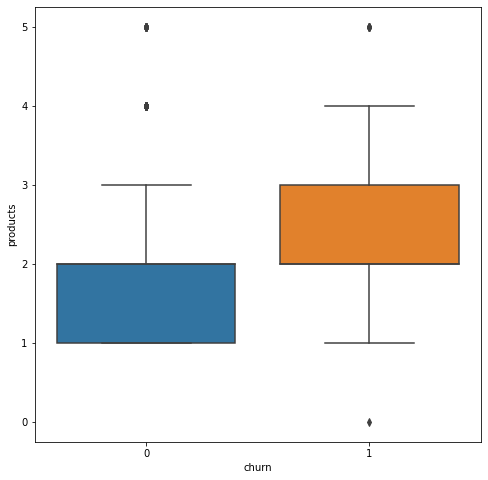

In [31]:
df_products_0 = df[df['churn'] == 0].groupby('products')['churn'].count().reset_index()
df_products_1 = df[df['churn'] == 1].groupby('products')['churn'].count().reset_index()
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['churn'], y=df['products'])

<AxesSubplot:>

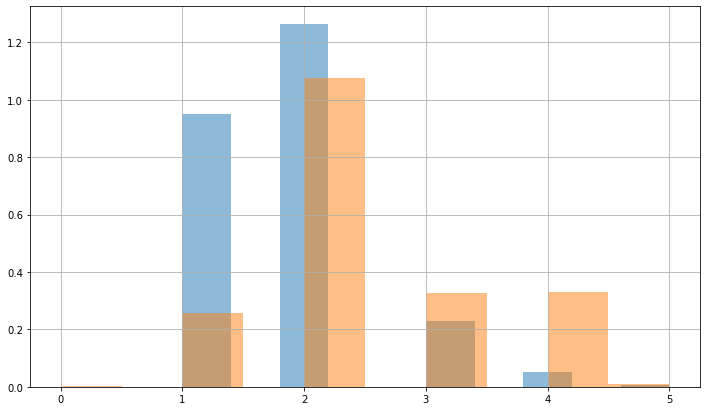

In [32]:
plt.figure(figsize=(12,7))
df[df['churn'] == 0]['products'].hist(bins=10, density=True, alpha=0.5)
df[df['churn'] == 1]['products'].hist(bins=10, density=True, alpha=0.5)

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Тут тоже проще посмотреть на уровни оттока.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

Вывод: из полученных данных видно, что отточные клиенты пользуются свыше 3-мя продуктами.

### Наличие кредитной карты (credit_card)

<AxesSubplot:ylabel='churn'>

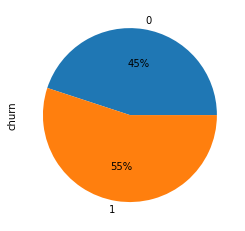

In [33]:
df[df['churn'] == 1].groupby('credit_card')['churn'].count().plot(
    kind='pie',  autopct='%1.0f%%')

<AxesSubplot:ylabel='churn'>

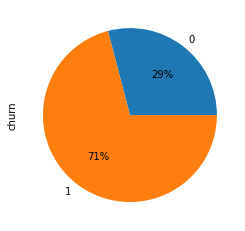

In [34]:
df[df['churn'] == 0].groupby('credit_card')['churn'].count().plot(
    kind='pie',  autopct='%1.0f%%')

Вывод: как видно из данных клиенты чаще имеют кредитные карты, причем не отточные клиенты чаще используют кредитки.

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Ты выше мог указать любой столбец вместо churn. Чтобы делать выводы о признаке кредитной карты нам нужно 2 пироговых диаграммы - одна с процентом кредиток у отточных, другая с процентом кредиток у неотточных и сравнивать.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

### Заработная карта клиента (est_salary)

<AxesSubplot:>

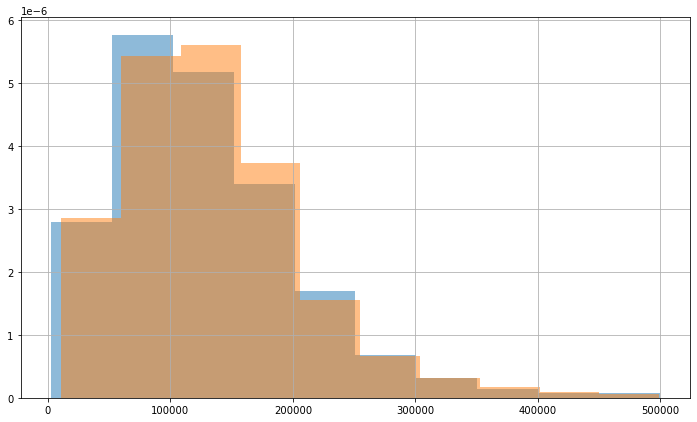

In [35]:
plt.figure(figsize=(12,7))
df[(df['churn'] == 0) &(df['est_salary'] < 500000.0)]['est_salary'].hist(bins=10, density=True, alpha=0.5)
df[(df['churn'] == 1) & (df['est_salary'] < 500000.0)]['est_salary'].hist(bins=10, density=True, alpha=0.5)

In [36]:
df['est_salary'].describe().round(-4)

count      10000.0
mean      150000.0
std       140000.0
min            0.0
25%        80000.0
50%       120000.0
75%       170000.0
max      1400000.0
Name: est_salary, dtype: float64

Вывод: из данных видно, что есть выбрасы с очень большими зарплатами, но основные все зарплаты укладываются до 200тыс. Стоит отметить что отток клиент виден в промежутке от 100тыс до 200тыс.

### Баланс на счете (Balance)

<AxesSubplot:>

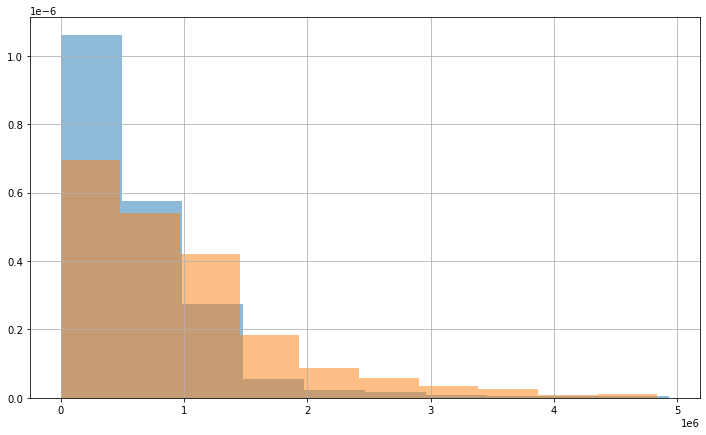

In [37]:
plt.figure(figsize=(12,7))
df[(df['churn'] == 0)  & (df['balance'] < 5000000.0)]['balance'].hist(bins=10, density=True, alpha=0.5)
df[(df['churn'] == 1) & (df['balance'] < 5000000.0)]['balance'].hist(bins=10, density=True, alpha=0.5)

In [38]:
df['balance'].describe().round(-4)

count        10000.0
mean        830000.0
std        1980000.0
min              0.0
25%         300000.0
50%         520000.0
75%         980000.0
max      119110000.0
Name: balance, dtype: float64

Вывод: отток наблюдается у клиентов, которые имеют больше 1млн на счете

### Активность клиентов (last_activity)

<AxesSubplot:ylabel='churn'>

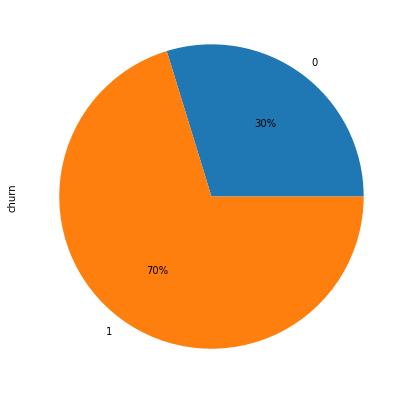

In [39]:
plt.figure(figsize=(12,7))
df[df['churn'] == 1].groupby('last_activity')['churn'].count().plot(
    kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='churn'>

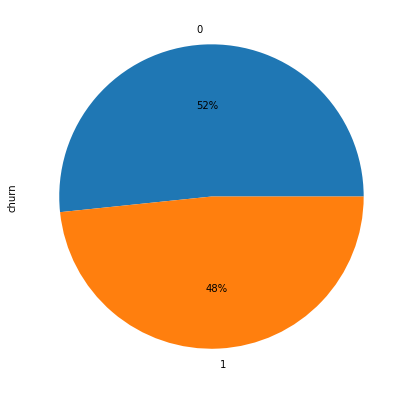

In [40]:
plt.figure(figsize=(12,7))
df[df['churn'] == 0].groupby('last_activity')['churn'].count().plot(
    kind='pie', autopct='%1.0f%%')

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Аналогичные проблемы, это просто распределение активных и неактивных без учёта оттока.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

Вывод: отточные клиенты чаще всего являются активными пользователями банка.

Общий вывод по разделу:
- из полученных данных видно, что взаимосвясь присутвует только в: кол-во продуктов и кол-во объектов недвижимости; кол-во кредитного скоринга и уровень активности; наличие кредитной карты и мужской пол.
- отточные клиенты имеют баллы от 825 до 925.
- у отточных клиентов диапазон кредитного скоринга меньше и сосредоточен в верхней части. У отточных клиентов есть выбросы в районе около 700.
- у отточных клиентов чаще всего есть объекты в собственности, в то время как большая часть не отточных не имеют собственности.
- отток клиентов увеличивается с 3-объектов. Отточным интервалом будет считать выше 3-х
- отточные клиенты пользуются свыше 3-мя продуктами.
-  клиенты чаще имеют кредитные карты, причем не отточные клиенты чаще используют кредитки.
- есть выбрасы с очень большими зарплатами, но основные все зарплаты укладываются до 200тыс. Стоит отметить что отток клиент виден в промежутке от 100тыс до 200тыс.
- отток наблюдается у клиентов, которые имеют больше 1млн на счете
- клиенты чаще всего являются активными пользователями банка.

корреляции с оттоком по шкале Чеддока:
- user_id - нет корреляции.
- score - кор. слабая.
- age - нет коррелиции
- equity - кор. слабая
- balance - нет корреляции.
- products - кор. умеренная
- credit_card - кор. слабая
- last_activity - кор. слабая
- est_salary - нет корреляции
- Ростов - нет корреляции
- Рыбинск - нет корреляции
- Ярославль - нет корреляции
- Мужчины - кор. слабая


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, опиши по шкале Чеддока все имеющиеся корреляции с оттоком в данных.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

Для того чтобы лучше выделить парамметры, которые влияют на отток клиентов, воспользуемся модулем phik.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Хорошо, что правильно установил стороннюю библиотеку и оставил код незакомментированным. Но лучше импорты помещать в начало тетради.
</div>

In [41]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М']


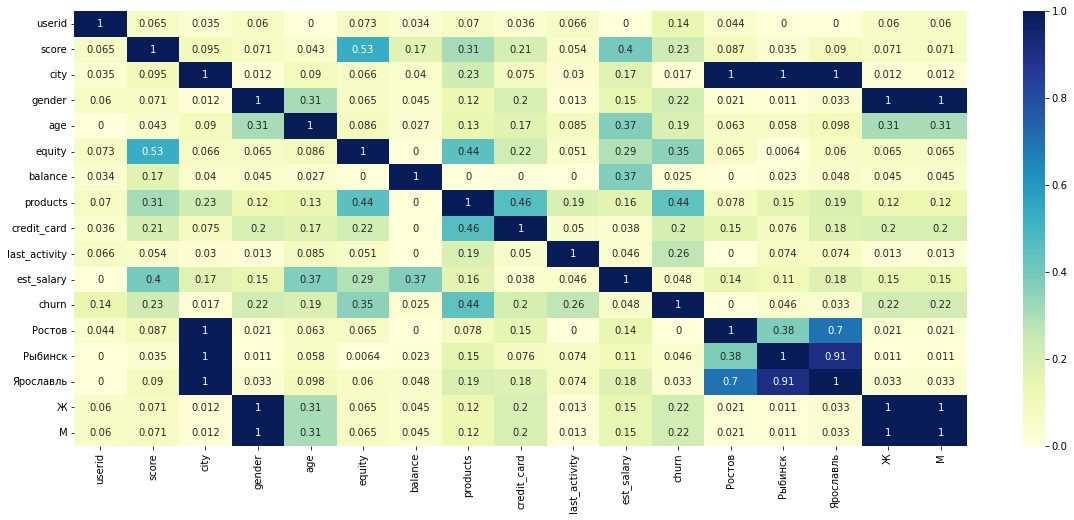

In [42]:
plt.figure(figsize=(20, 8))
sns.heatmap(phik_overview, cmap="YlGnBu", annot=True)
plt.show()

In [43]:
phik_overview['churn'].sort_values(ascending=False)

churn            1.000000
products         0.440106
equity           0.352883
last_activity    0.261815
score            0.228322
М                0.218275
Ж                0.218275
gender           0.218275
credit_card      0.204077
age              0.189179
userid           0.139757
est_salary       0.047778
Рыбинск          0.045891
Ярославль        0.033236
balance          0.024634
city             0.016762
Ростов           0.000000
Name: churn, dtype: float64

Вывод: как видим из полученных данных видно, что наибольшее воздействие на отток клиентов оказывают: product, equity. Так же видно, что немалое воздействие оказывают: last_activity, score, gender, credit_cart, age. Стоит отметить, phik еще уловил зависимость с одинаковым показателем для М и Ж.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Прекрасно! По корреляции Пирсона можно также установить направление влияние, или понять, что влияние нелинейное, если корреляция phik есть, а по Пирсону (по умолчанию в .corr) её нет.
</div>

### Модель классификации
Построим модель классификации и сравним с нашими первыми выводами

In [44]:
df_ml = df.copy()
df_ml.isnull().sum()

userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
Ростов              0
Рыбинск             0
Ярославль           0
Ж                   0
М                   0
dtype: int64

In [45]:

df_ml = pd.get_dummies(df_ml)
df_ml.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0,1,0,1,0
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0,1,0,1,0
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,0,1,0,1,0
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0,0,1,1,0
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0,0,1,0,1


<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Пожалуйста, не выводи в ноутбуке датафреймы при помощи print.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   исправил   </div>

In [46]:
len(df_ml.drop_duplicates(subset=['userid']))

9927

In [47]:
df_ml.isnull().sum()

userid               0
score                0
age                  0
equity               0
balance           2295
products             0
credit_card          0
last_activity        0
est_salary           0
churn                0
Ростов               0
Рыбинск              0
Ярославль            0
Ж                    0
М                    0
city_Ростов          0
city_Рыбинск         0
city_Ярославль       0
gender_Ж             0
gender_М             0
dtype: int64

In [48]:
len(df_ml.drop_duplicates(subset=['userid']))

9927

In [49]:
print(df_ml['userid'].sum(), df['userid'].sum())

1718147126 1718147126


In [50]:
df_ml = df_ml.drop(['city_Ростов',
            'city_Рыбинск',
            'city_Ярославль',
            'gender_Ж',
            'gender_М'], axis=1)

df_ml = df_ml.drop_duplicates(subset=['userid']).merge(df[['userid', 'city', 'gender']].drop_duplicates(subset=['userid']), on='userid', how='inner')

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   В процессе слияния модели были обнаружены небольшое кол-во дублей в user_id, из-за чего после слияния добавлялся 1% дублированных строк. Было решено этими дублями пожертвовать   </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👌</big></b></div>

In [51]:
df_ml.isnull().sum()

userid              0
score               0
age                 0
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
Ростов              0
Рыбинск             0
Ярославль           0
Ж                   0
М                   0
city                0
gender              0
dtype: int64

In [52]:
df_ml.columns

Index(['userid', 'score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов',
       'Рыбинск', 'Ярославль', 'Ж', 'М', 'city', 'gender'],
      dtype='object')

In [53]:
len(df_ml)

9927

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Мы выше выясняли, что заполнять нулём может быть неоптимально. В такой ситуации можно отбрасывать целый столбец и смотреть, изменились ли метрики модели. (Тут это оказывается один из важных признаков модели, т.к. клиенты с нулевым балансом получаются почти неотточны).
    
Также можно заполнить пропуски другой моделью. Это один из методов <a href='https://tproger.ru/translations/data-imputation/'>импутации данных</a>.
</div>


<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Заполнил данные медианой, хотел сделать более интересно и через глубокое обучение datawig, но на предикте вылетает ошибка. Причину нашел - нужна более старая версия пандас, у меня она не встала.  </div>


In [54]:
df_0 = df.drop_duplicates(subset=['userid'])

In [55]:
train, test = train_test_split(df_ml, train_size=0.6, random_state=0, stratify=df_ml['churn'])
val, test = train_test_split(test, train_size=0.5, random_state=0, stratify=test['churn'])

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
В реальной жизни никто так не делает, всегда используют кросс-валидацию, т.к. фактор рандомности из-за случайного разбиения сильно влияет на метрики. Круто, что сделал стратификацию.
</div>

In [56]:
train.columns

Index(['userid', 'score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов',
       'Рыбинск', 'Ярославль', 'Ж', 'М', 'city', 'gender'],
      dtype='object')

In [57]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9926
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9927 non-null   int64  
 1   score          9927 non-null   float64
 2   age            9927 non-null   int64  
 3   equity         9927 non-null   int64  
 4   balance        7667 non-null   float64
 5   products       9927 non-null   int64  
 6   credit_card    9927 non-null   int64  
 7   last_activity  9927 non-null   int64  
 8   est_salary     9927 non-null   float64
 9   churn          9927 non-null   int64  
 10  Ростов         9927 non-null   uint8  
 11  Рыбинск        9927 non-null   uint8  
 12  Ярославль      9927 non-null   uint8  
 13  Ж              9927 non-null   uint8  
 14  М              9927 non-null   uint8  
 15  city           9927 non-null   object 
 16  gender         9927 non-null   object 
dtypes: float64(3), int64(7), object(2), uint8(5)
memory 

In [58]:
X = ['score', 'city', 'gender', 'age', 'equity', 'balance',
     'products', 'credit_card', 'last_activity', 'est_salary']
cat_features = ['city', 'gender']
y = ['churn']

In [59]:
train_data = Pool(
    data=train[X],
    label=train[y],
    cat_features=cat_features
                  )
valid_data = Pool(
    data=val[X],
    label=val[y],
    cat_features=cat_features
)

In [60]:
params = {
    'verbose': 100,
    'random_seed': 0,
    'learning_rate': .01
}

In [61]:
model = CatBoostClassifier(**params)
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6847481	test: 0.6850887	best: 0.6850887 (0)	total: 59.6ms	remaining: 59.5s
100:	learn: 0.3662515	test: 0.3803456	best: 0.3803456 (100)	total: 431ms	remaining: 3.84s
200:	learn: 0.3137739	test: 0.3356295	best: 0.3356295 (200)	total: 784ms	remaining: 3.12s
300:	learn: 0.2942501	test: 0.3209592	best: 0.3209592 (300)	total: 1.17s	remaining: 2.71s
400:	learn: 0.2832100	test: 0.3135947	best: 0.3135947 (400)	total: 1.51s	remaining: 2.26s
500:	learn: 0.2753968	test: 0.3096706	best: 0.3096706 (500)	total: 1.84s	remaining: 1.83s
600:	learn: 0.2692266	test: 0.3069999	best: 0.3069999 (600)	total: 2.17s	remaining: 1.44s
700:	learn: 0.2631113	test: 0.3047088	best: 0.3047088 (700)	total: 2.48s	remaining: 1.06s
800:	learn: 0.2565814	test: 0.3020958	best: 0.3020958 (800)	total: 2.82s	remaining: 700ms
900:	learn: 0.2505716	test: 0.3001926	best: 0.3001926 (900)	total: 3.15s	remaining: 347ms
999:	learn: 0.2442030	test: 0.2987224	best: 0.2987209 (998)	total: 3.5s	remaining: 0us

bestTest = 0.29

In [62]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,balance,20.115326
1,score,17.504463
2,last_activity,13.893707
3,age,12.056455
4,products,9.241693
5,gender,7.919453
6,equity,6.249520
7,est_salary,5.516699
8,credit_card,4.429149
9,city,3.073537


In [63]:
phik_overview_train = train.phik_matrix()
phik_overview_train['churn'].sort_values(ascending=False)

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М']


churn            1.000000
products         0.441039
equity           0.358750
last_activity    0.264579
score            0.229485
credit_card      0.211102
Ж                0.207776
gender           0.207776
М                0.207776
age              0.189377
userid           0.171064
est_salary       0.061182
Рыбинск          0.038552
Ярославль        0.029259
city             0.013151
Ростов           0.000000
balance          0.000000
Name: churn, dtype: float64

Вывод по разделу:
- анализ phik позволил выделить следующие важные параметры: last_activity, score, gender, credit_cart, age. Стоит отметить, phik еще уловил зависимость с одинаковым показателем для М и Ж.
- модель машинного бучения выделила следующие важные параметры: equity, score, last_activity, age, priduct.
Далее рассмотрим все параметры подробнее и выдвинем гипотезы.

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

## 3.2 Выделите портреты клиентов, которые склонны уходить из банка

### Как влияет на отток кол-во продуктов, которыми пользуется клиент

In [64]:
df.groupby('products')['churn'].agg(['count', 'mean']) 

,count,mean
products,,
0,1,1.000000
1,3341,0.070338
2,5108,0.191660
3,1046,0.284895
4,474,0.632911
5,30,0.300000


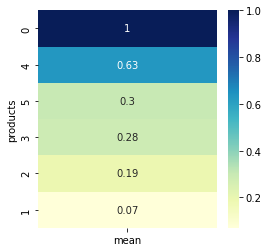

In [65]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.groupby('products')['churn'].agg(['mean']).sort_values(by='mean', ascending=False), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
- из полученных данных мы видим тенденцию к увеличению оттока при увеличении числа продуктов, но стоит отметить что в выборку где больше 3-х продуктов попало малая доля клиентов.
- меньше всего уходят клиенты, которые пользуются одним продуктом.

### Как влияет кол-во объектов собственности на отток клиентов

In [66]:
df.groupby('equity')['churn'].agg(['count', 'mean'])

,count,mean
equity,,
0,2592,0.034722
1,774,0.120155
2,1052,0.157795
3,1543,0.209332
4,1850,0.251351
5,1918,0.300834
6,161,0.360248
7,80,0.462500
8,17,0.352941


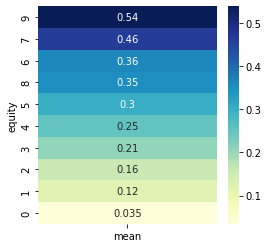

In [67]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.groupby('equity')['churn'].agg(['mean']).sort_values(by='mean', ascending=False), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
- мы так же можем заметить тенденцию по увеличению оттока при увеличении кол-во объектов в собственности, но стоит заметить что клиентов с увеличением становиться заметно меньше и это нормально т.к. кол-во людей с большим количеством собственности всегда будет заметно меньше подавляющего большинства.
- практически не уходят клиенты, которые не имеют объектов недвижимости.

### Влияние активности клиентов на отток

In [68]:
df.groupby('last_activity')['churn'].agg(['count', 'mean'])

,count,mean
last_activity,,
0,4765,0.113746
1,5235,0.244508


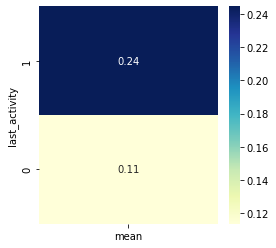

In [69]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.groupby('last_activity')['churn'].agg(['mean']).sort_values(by='mean', ascending=False), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
- как мы можем видеть активные клиенты в два раза чаще уходят из данного банка
- не активные в два раза чаще остаются

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Категориальные данные исследованы хорошо.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Тут и ниже не вижу исследования уровня оттока по городам, хотя в презентации Ярославль почему-то выделен как отточный город.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

Добавил

### Как влияет город на отток

<AxesSubplot:>

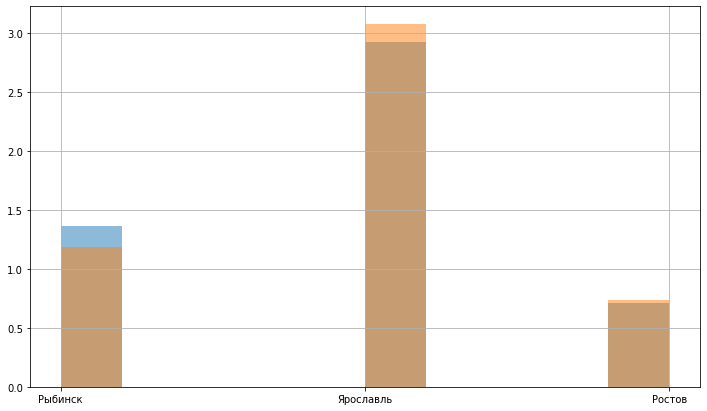

In [70]:
plt.figure(figsize=(12,7))
df[df['churn'] == 0]['city'].hist(bins=10, density=True, alpha=0.5)
df[df['churn'] == 1]['city'].hist(bins=10, density=True, alpha=0.5)

In [71]:
df_city_0 = df[df['churn'] == 0].groupby('city')['userid'].count().reset_index()
df_city_1 = df[df['churn'] == 1].groupby('city')['userid'].count().reset_index()

In [72]:
df_city_0['%'] = df_city_0['userid'] / len(df) * 100
df_city_0

,city,userid,%
0,Ростов,1162,11.62
1,Рыбинск,2231,22.31
2,Ярославль,4785,47.85


In [73]:
df_city_1['%'] = df_city_1['userid'] / len(df) * 100
df_city_1

,city,userid,%
0,Ростов,269,2.69
1,Рыбинск,432,4.32
2,Ярославль,1121,11.21


In [74]:
df_city_1['%'] = df_city_1['userid'] / df_city_0['userid'] * 100
df_city_1

,city,userid,%
0,Ростов,269,23.149742
1,Рыбинск,432,19.363514
2,Ярославль,1121,23.427377


Вывод: из полученных данных видно, что уровень оттока выше в городе Ярославль, но стоит отметить что такая же тенденция наблюдается и с не отточными. Это связано больше с кол-м клиентов в городе, т.к. если рассмотреть в процентном соотношении, то отток по городам примерно одинаков.

### Влияние баллов score на отток

<AxesSubplot:>

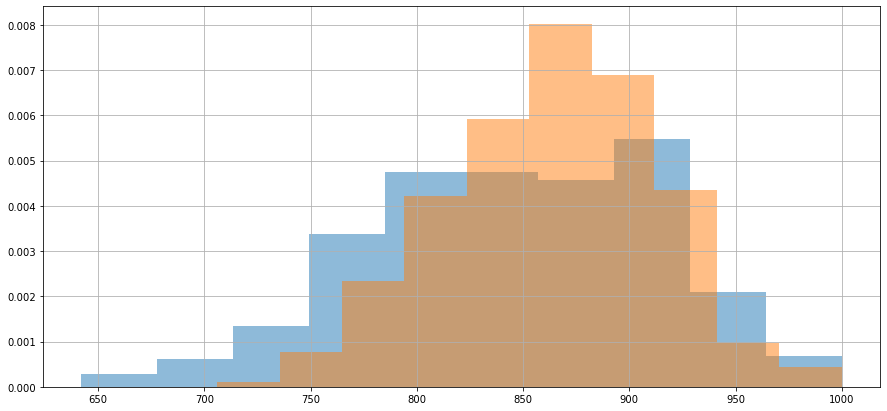

In [75]:
plt.figure(figsize=(15,7))
df[df['churn'] == 0]['score'].hist(density=True, alpha=0.5)
df[df['churn'] == 1]['score'].hist(density=True, alpha=0.5)

In [76]:
df['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

Вывод:
- из данных видно, у которых балл больше 820 до 920 и от 925 до 940, больше склонны к оттоку
- клиенты меньше 700 менее всего склонны к оттоку.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Почему именно 3 участка? Почему не 4, 5, 22? Как-то можно правильно выбрать это число, или надо другой метод применять, чтобы посмотреть? Возможно гистограмму или kde-график?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

### Как влияет пол на отток клиентов

In [77]:
df.groupby('gender')['churn'].agg(['count', 'mean'])

,count,mean
gender,,
Ж,4992,0.127804
М,5008,0.236422


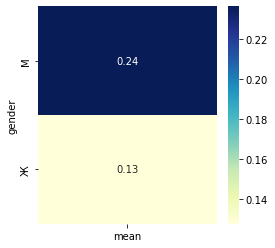

In [78]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.groupby('gender')['churn'].agg(['mean']).sort_values(by='mean', ascending=False), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
- из полученных данных видно, что мужчины чаще склонны к оттоку
- женщины реже уходят

### Влияние наличия кредитной карты на отток

In [79]:
df.groupby('credit_card')['churn'].agg(['count', 'mean'])

,count,mean
credit_card,,
0,3196,0.256258
1,6804,0.147413


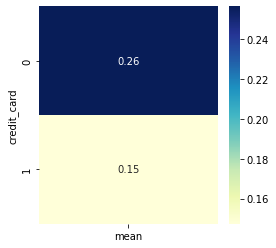

In [80]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.groupby('credit_card')['churn'].agg(['mean']).sort_values(by='mean', ascending=False), cmap="YlGnBu", annot=True)
plt.show()

Вывод:
- клиенты без кредитных карт намного чаще уходят, чем клиенты пользующиеся кредитками
- клиентами с кредитками чаще остаются

### Влияние возраста на отток

<AxesSubplot:>

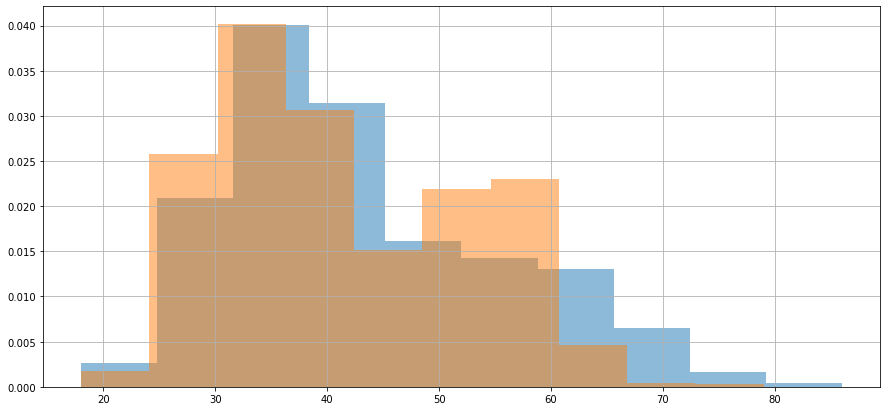

In [81]:
plt.figure(figsize=(15,7))
df[df['churn'] == 0]['age'].hist(density=True, alpha=0.5)
df[df['churn'] == 1]['age'].hist(density=True, alpha=0.5)

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Смущает что возраст слево в heatmap идет с нуля, в таблице таких значений нет.   </div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>Можно использовать plt.ylim для исправления.

Но это не уровень оттока (относительный показатель), а количество отточных (абсолютный показатель). Об отточном интервале <b>среди всех клиентов</b> мы судить по этому не можем.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

Вывод:
- из полученных данных видно, что клиенты от 25 до 35 и 50 до 60 лет чаще всего уходят из банка.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>
Во первых, такие графики не нужно сортировать по значению, так сложнее воспринимать информацию, во-вторых, можно вообще не разбивая на участки построить heatmap по уровням оттока по каждому возрасту (без аннотаций в графике текстовых), так мы сможем сделать более точные выводы.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

### Влияние баланса на счете на отток

<AxesSubplot:>

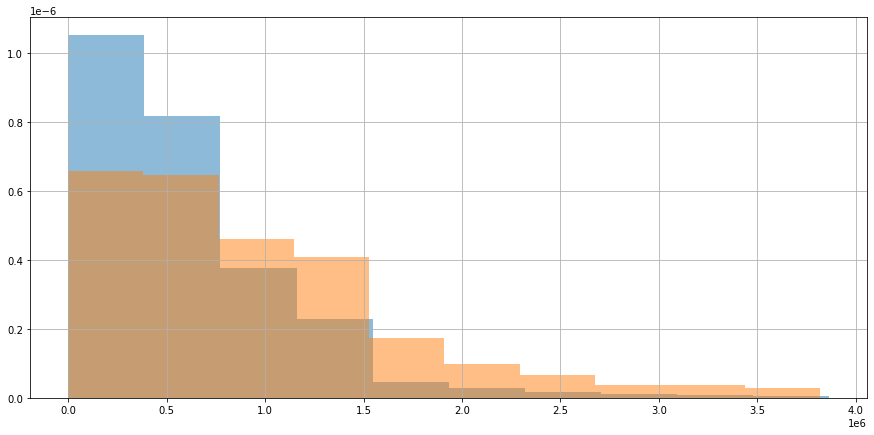

In [82]:
plt.figure(figsize=(15,7))
df[(df['churn'] == 0)&(df['balance'] > 0)&(df['balance'] < 3870000.0)]['balance'].hist(density=True, alpha=0.5)
df[(df['churn'] == 1)&(df['balance'] > 0)&(df['balance'] < 3870000.0)]['balance'].hist(density=True, alpha=0.5)

In [83]:
df['balance'].describe().round(-4)

count        10000.0
mean        830000.0
std        1980000.0
min              0.0
25%         300000.0
50%         520000.0
75%         980000.0
max      119110000.0
Name: balance, dtype: float64

In [84]:
df[df['churn']==1]['balance'].describe().round(-4)

count           0.0
mean      1130000.0
std       2030000.0
min             0.0
25%        390000.0
50%        780000.0
75%       1350000.0
max      64870000.0
Name: balance, dtype: float64

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🚫<br>
Что значит этот график? Кажется совсем ничего. В целом — категорически нельзя делать группировку по показателю с огромным количеством уникальных значений. Используй <tt>.round(-4)</tt> или что-то подобное.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

Вывод:
- Начиная с 750тыс на счете клиенты начинают  покидать банк

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Тут нужно достаточно точно (±150т.р) провести границу между отточными и неотточными.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Ты отдельно проанализировал отточных и отдельно неотточных. Начиная с какого количества средств на счёте клиенты начинают чаще уходить от нас, чем в среднем по банку? 250 тыс? 500 тыс? 750 тыс? 1 миллион?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

### Рассмотрим, как влияют парамметры на модель в нашей получившейся модели

In [85]:
!pip install shap

In [86]:
import shap

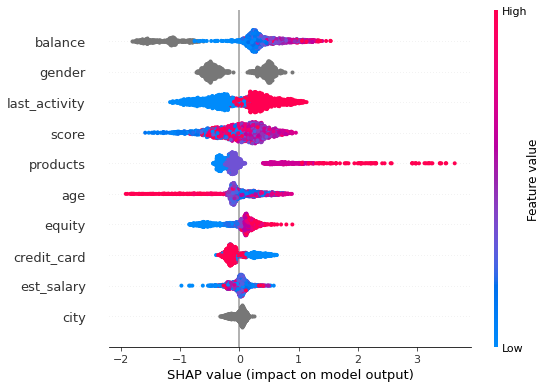

In [87]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])
shap.summary_plot(shap_values, test[X])

Рассмотрим переменные подробнее

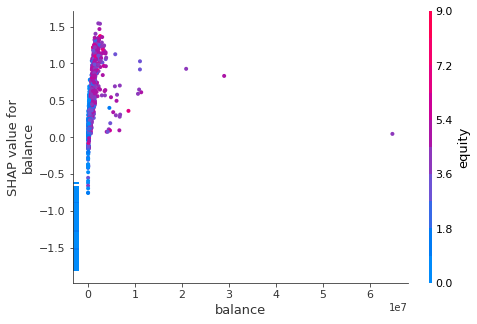

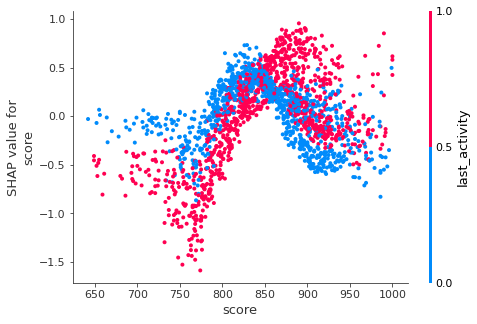

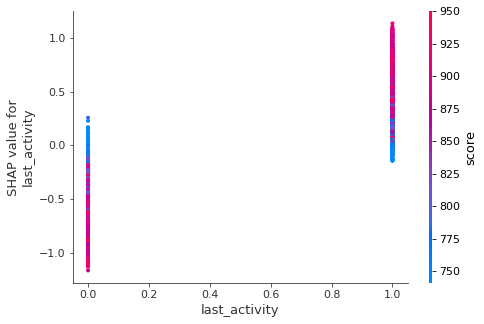

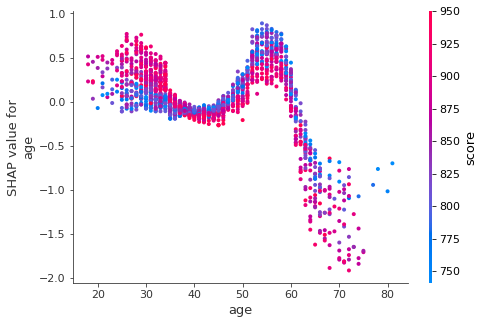

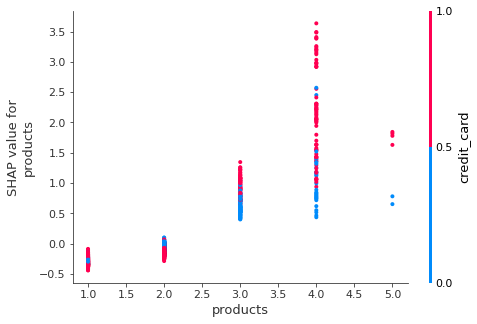

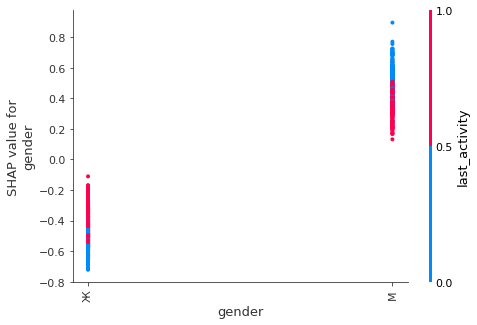

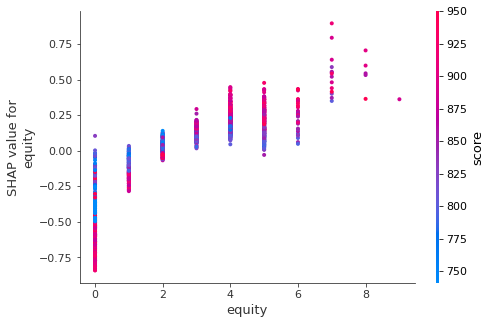

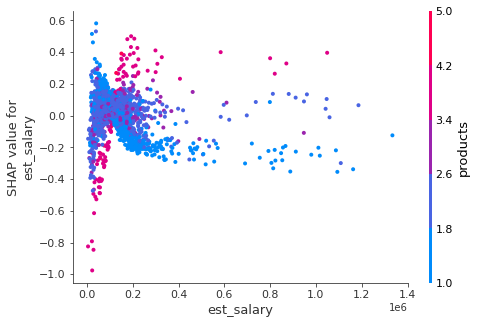

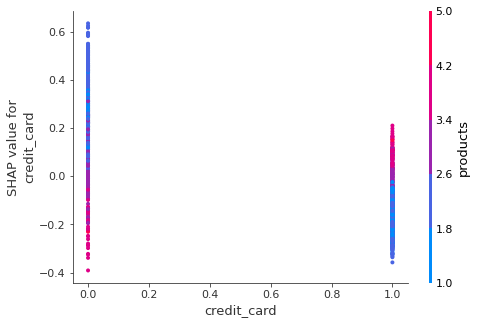

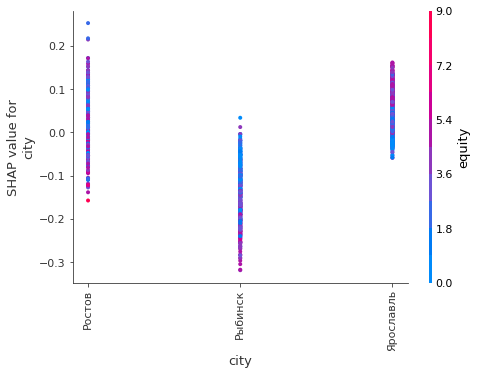

In [88]:
for i in model.get_feature_importance(prettified=True)['Feature Id'].values:
    shap.dependence_plot(i, shap_values, test[X])

Вывод:
- чем больше активность пользователя, чем больше склонен к оттоку
- пользователи, которые пользуются большим кол-м продуктов, склонны к оттоку
- снижение возраста клиента, тем больше он склонен к оттоку
- чем больше объектов в собственнсти, тем выше отток
- после заполнения ср. значений пропусками. получилось что балланс не сильно влияет на отток.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Красиво, но сложно объяснить, что эти графики значат, чтобы люди поняли.
</div>

<b>Общий вывод по разделу:</b>

Вывод по разделу построю по описанию двух портретов клиентов склонных к оттоку/не склонных.

<b>Результаты на основе eda</b>
<b>Клиенты склонные к оттоку:</b>
- являются пользователями от 3-х банковских продуктов
- имеют в основном от 3-х объектов в собственности. 
- являются активными пользователями банка
- имеют балл score больше 820 до 940. Разница между баллами в сравнении с не отточными не существенная 4%
- чаще всего являются мужчинами
- не имеют кредитных карт
- возраст от 25 до 35 и от 50 до 60 лет
- имеют большие суммы на балансе счета, от 750тыс.

<b>Клиенты не склонные к оттоку:</b>
- пользуются одним банковским продуктом
- не имеют объектов недвижимости в собственности
- не являются активными пользователями банковских услуг
- имеют меньший балл score
- чаще всего являются женщинами
- имеют кредитные карты
- имеют возраст до 25, от 25 до 50
- имеют на счетах банка до 750тыс.

<b>Результаты на основе модели построенной в CatBoost</b>
<b>Клиенты склонные к оттоку:</b>
- чем больше активность пользователя, чем больше склонен к оттоку
- пользователи, которые пользуются большим кол-м продуктов, склонны к оттоку
- снижение возраста клиента, тем больше он склонен к оттоку
- чем больше объектов в собственнсти, тем выше отток



<b>Клиенты не склонные к оттоку:</b>
- пользуются меньшим кол-м банковских продуктов
- имеют мало объектов недвижимости в собственности
- не являются активными пользователями банковских услуг
- имеют кредитные карты
- являются возрастными, от 25 до 35 и 50 до 60


Проанализируем и соединим воедино получившиеся портреты:

<b>Клиенты склонные к оттоку:</b>
- являются пользователями больше от 2-х банковских продуктов
- если имеют объекты в собственности (в основном от 3-х)
- являются активными пользователями банка
- имеют балл score 820 до 940
- чаще всего являются мужчинами
- не имеют кредитных карт
- возраст от 25 до 35 лет и от 50 до 60 (основное кол-во попадает в первую группу)
- имеют на счете от 750тыс


<b>Клиенты не склонные к оттоку:</b>
- пользуются одним банковским продуктом
- не имеют объекты недвижимости в собственности
- не являются активными пользователями банковских услуг
- имеют наимеший балл score
- чаще всего являются женщинами
- имеют кредитные карты
- младше 25 и старше 35-ти до 60-ти лет
- имеют малые суммы на счетах банка (до 750тыс).

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>Можно также упомянуть, что имеющие пропуски в балансе не склонны к оттоку.
    
В презентации лучше дать портрет отточного вместе с портретом неотточного.
</div>

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
По скору будет также верхняя граница, по возрасту неполные выводы (там 2 отточных интервала), по объектам собственности, когда считать клиента скорее отточным? Начиная уже с 1 балла?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
По возрасту неверная верхняя граница отточного интервала. Это будет видно, если построить для каждого имеющегося возраста уровень оттока и изобразить на графике их.
    
Если клиенты от 48 до 60 скорее отточны, то клиентов просто "старше 31 года" нельзя считать неотточными.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

## Шаг 5. Проверка статистических гипотез
Проверим гипотезы:
- различия дохода между теми клиентами, которые ушли и теми, которые остались
- различие кол-ва баллов кредитного score между пользователями которые ушли и которые остались


### Различия дохода между теми клиентами, которые ушли и теми, которые остались

Сформулируем две гипотезы:
H0: нет различия дохода между клиентами которые ушли и клиентами которые остались
H1: есть различие дохода между клиентами которые ушли и клиентами которые остались

In [89]:
df_salary_0 = df[df['churn'] == 0]['est_salary'].sample(n=100)
df_salary_1 = df[df['churn'] == 1]['est_salary'].sample(n=100)

<AxesSubplot:>

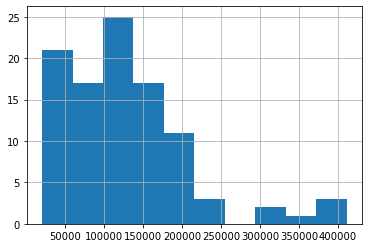

In [90]:
df_salary_0.hist()

<AxesSubplot:>

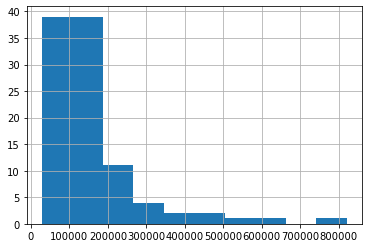

In [91]:
df_salary_1.hist()

In [92]:
alpha = .05 # пороговое значение возьмем за 5%

results = st.ttest_ind(
    df_salary_0,
    df_salary_1,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05898030612116775
Не получилось отвергнуть нулевую гипотезу


In [93]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(
    df_salary_0,
    df_salary_1
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=4514.000, p=0.236
Отвергаем нулевую гипотезу


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;👀<br>
В библиотеке scipy в методе <tt>stats.ttest_ind</tt> уже стоит по умолчанию параметр <tt>equal_var = True</tt>. Что он означает и подходит ли он для проводимого нами теста?
</div>


<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Данный критерий свидетельствует о равности дисперсии выборок. Понял свою ошибку исправил.   </div>


Вывод: есть различия дохода между клиентами которые ушли и клиентами которые остались

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, повтори эту проверку ниже при помощи u-критерия Манна-Уитни, если между методами возникнет разница, прокомментируй, почему она возникла. Какой критерий тут будет точнее и почему?
</div>


<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Разница возникла и с парамметром equal_var = False, Стьюдинт не отвергает h0, а критерий Манна-Уитни отвергает h0. Это связано с тем что медианы воборок различны. критерий Манна-Уитни непараметрический критерий, он не так строг к выборкам и Манни-Уитни более устойчив к выбрасам в данных, чем критерий Стьюдента. Манни-Уитни в первом случаи будет точнее, но во второй гипотезе бедт точнее Стьюдин т.к. там данные довольно нормально распределены и без сильных перекосов.  </div>


<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;📌<br>
Так как выборки большие, то нам неважно, что они распределены ненормально, мы можем использовать t-критерий. Требование нормальности распределения происходит из медицинской литературы, где традиционно маленькие выборки. 
    
Цитирую теорию (Спринт 5, Тема 4/6, Проверка гипотез):
<blockquote>Выборочные средние должны быть нормально распределены.
А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Очень часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста это необязательно.</blockquote>
Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов.

При разном размере выборок, который нам тут известен мы ставим equal_var в положение False просто из-за особенностей работы метода ttest_ind. И вообще, надёжнее при любых сомнениях ставить его в это положение, это лишь немного снижает мощность данного стат критерия. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. В литературе встречаются утверждения, что его нельзя проводить, если есть значительное число повторяющихся значений или если выборки большие, однако это относится, видимо, к старым реализациям теста.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Спасибо  </div>

### Различие кол-ва баллов кредитного score между пользователями которые ушли и которые остались
Сформулируем две гипотезы:
H0: нет различия кол-ва баллов кредитного score между клиентами которые ушли и клиентами которые остались
H1: есть различие кол-ва баллов кредитного score между клиентами которые ушли и клиентами которые остались


In [94]:
df_score_0 = df[df['churn'] == 0]['score'].sample(n=100)
df_score_1 = df[df['churn'] == 1]['score'].sample(n=100)

<AxesSubplot:>

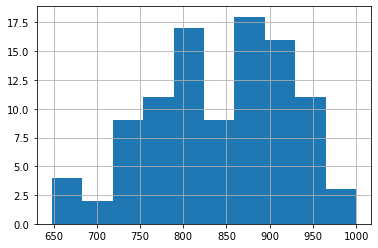

In [95]:
df_score_0.hist()

<AxesSubplot:>

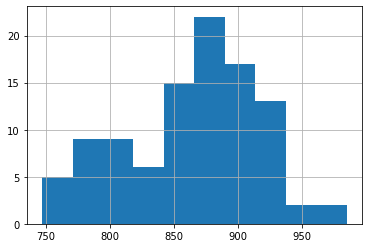

In [96]:
df_score_1.hist()

In [97]:
alpha = .05 # пороговое значение возьмем за 5%

results = st.ttest_ind(
    df_score_0,
    df_score_1,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.023350101623271734
Отвергаем нулевую гипотезу


In [98]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(
    df_score_0,
    df_score_1
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=4307.000, p=0.091
Отвергаем нулевую гипотезу


Вывод: есть различия кол-ва баллов кредитного score между клиентами которые ушли и клиентами которые остались

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;✔️<br>
Гипотезы сфомулированы верно, расчёты проведены и интерпретированы корректно
</div>

## Шаг 6. Промежуточный итог о том, какие показатели стратегически влияют на отток.
В ходе исследования подтвердились следующие гипотезы:
- есть различия дохода между клиентами, которые ушли и клиентами которые остались
- есть различия кол-ва баллов кредитного score между клиентами которые ушли и клиентами которые остались

и получились следующие портреты клиентов:

<b>Клиенты склонные к оттоку:</b>
- являются пользователями больше от 2-х банковских продуктов
- если имеют объекты в собственности (в основном от 3-х)
- являются активными пользователями банка
- имеют балл score 820 до 940
- чаще всего являются мужчинами
- не имеют кредитных карт
- возраст от 25 до 35 лет и от 50 до 60 (основное кол-во попадает в первую группу)
- имеют на счете от 750тыс


<b>Клиенты не склонные к оттоку:</b>
- пользуются одним банковским продуктом
- не имеют объекты недвижимости в собственности
- не являются активными пользователями банковских услуг
- имеют наимеший балл score
- чаще всего являются женщинами
- имеют кредитные карты
- младше 25 и старше 35-ти до 60-ти лет
- имеют малые суммы на счетах банка (до 750тыс).



## Шаг 7. Сегментация на основе стратегических показателей.

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Ниже гистограммы, но они ненормированные. Чтобы сделать нормированные таким методом, нужно на одном полотне последовательно 2 раза построить гистограммы с параметром density=True.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>

churn
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: products, dtype: object

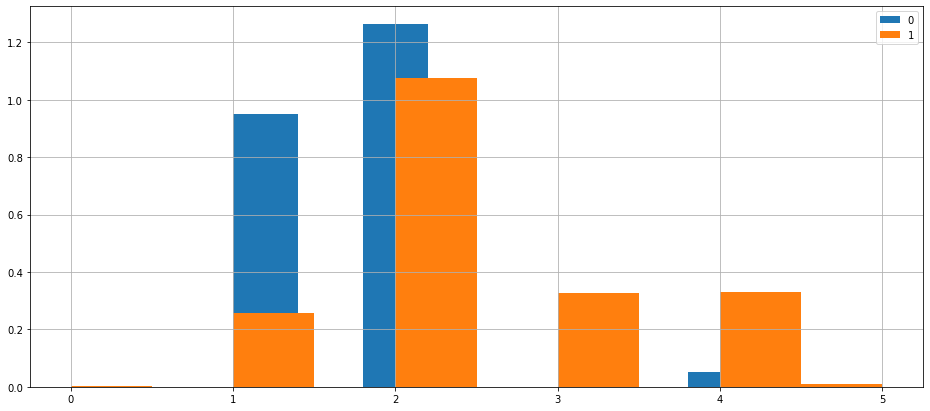

In [99]:
df[df['churn']==0].groupby('churn')['products'].hist(figsize=(16, 7), legend=True, density=True)
df[df['churn']==1].groupby('churn')['products'].hist(figsize=(16, 7), legend=True, density=True)

Вывод: как видно пользователей можно разделить на три сегмента: один продукт, два продукта и свыше 3-х продуктов

churn
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: equity, dtype: object

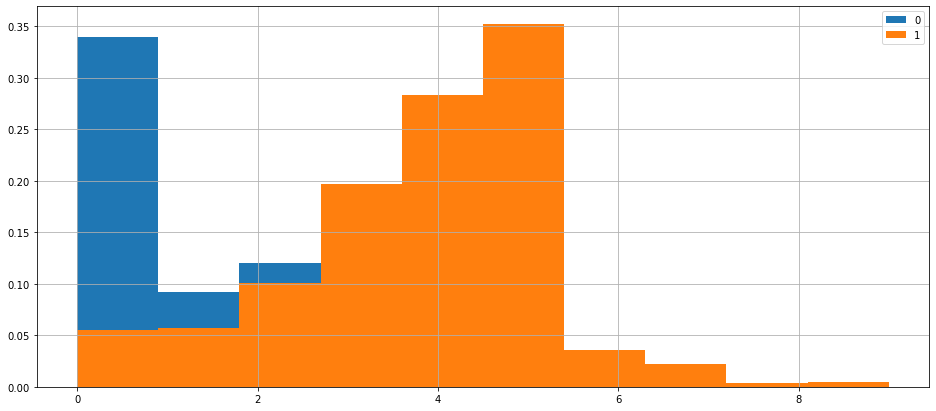

In [100]:
df[df['churn']==0].groupby('churn')['equity'].hist(figsize=(16, 7), legend=True, density=True)
df[df['churn']==1].groupby('churn')['equity'].hist(figsize=(16, 7), legend=True, density=True)

 Вывод: как видим пользователей можно разделить: до 1-го объектов недвижимости, более 2-х до 5-ти и свыше 5-ти.

churn
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

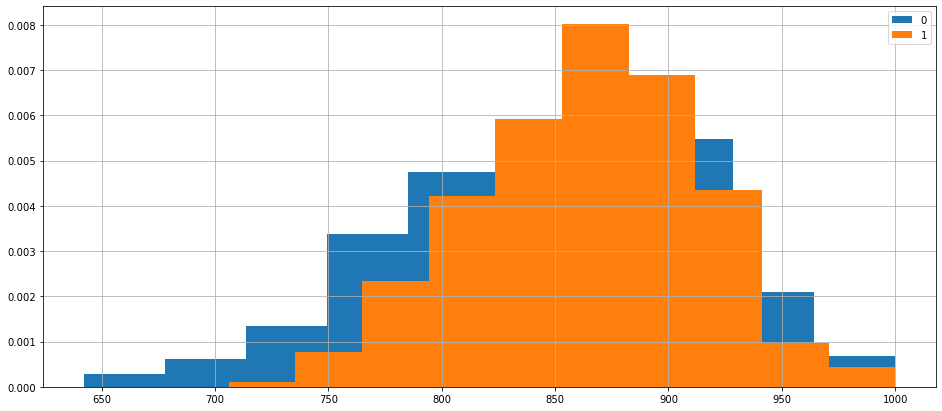

In [101]:
df[df['churn']==0].groupby('churn')['score'].hist(figsize=(16, 7), legend=True, density=True)
df[df['churn']==1].groupby('churn')['score'].hist(figsize=(16, 7), legend=True, density=True)

In [102]:
df[df['churn'] == 1]['score'].describe()

count    1822.000000
mean      863.414380
std        49.606824
min       706.000000
25%       828.000000
50%       866.000000
75%       898.000000
max      1000.000000
Name: score, dtype: float64

Вывод: Пользователей можно разделить на следующие сегменты по уровню кредитного рейтинга: до 828, от 828 до 910 и свыше 910

churn
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

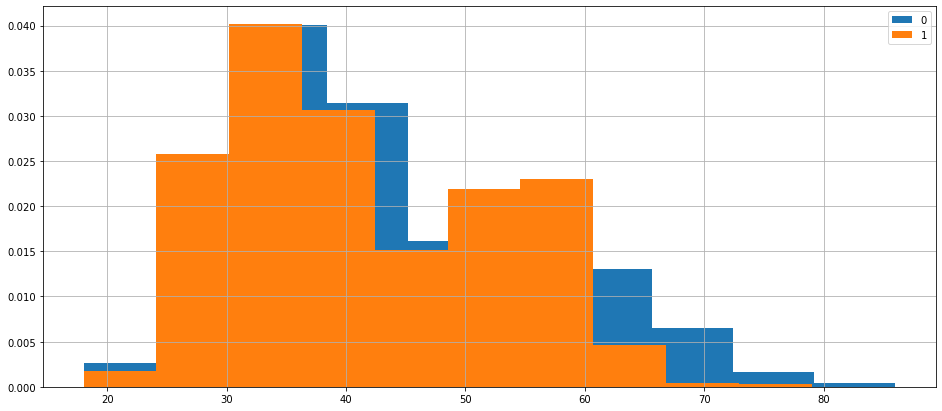

In [103]:
df[df['churn']==0].groupby('churn')['age'].hist(figsize=(16, 7), legend=True, density=True)
df[df['churn']==1].groupby('churn')['age'].hist(figsize=(16, 7), legend=True, density=True)

In [104]:
df['age'].describe()

count    10000.000000
mean        42.837100
std         12.128507
min         18.000000
25%         34.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: age, dtype: float64

Вывод: пользователей можно разделить на следующие сегменты по возрасту: от 18 до 25, от 25 до 35, от 35 до 50, от 50 до 60, от 60 и выше

churn
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: city, dtype: object

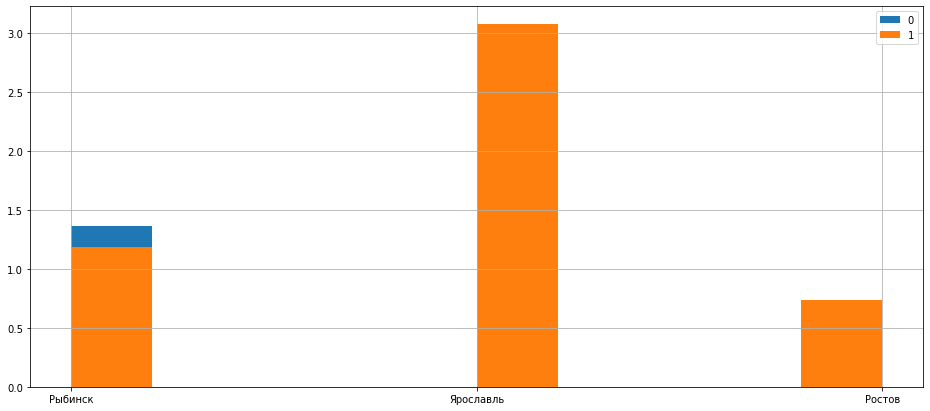

In [105]:
df[df['churn']==0].groupby('churn')['city'].hist(figsize=(16, 7), legend=True, density=True)
df[df['churn']==1].groupby('churn')['city'].hist(figsize=(16, 7), legend=True, density=True)

Вывод: по городам пользователей можно разделить на три города: Рыбинск, Ярославль и Ростов.

<b>Вывод по разделу:</b>
Пользователей получилось разделить на следующие сегменты:

Географические:
- Рыбинск
- Ярославль
- Ростов

Демографические:
(По возрасту)
- от18 до 25
- от 25 до 35
- от 35 до 50
- от 50 до 60
- старше 60-ти

(По полу)
- мужчины
- женщины

Потребительские мотивы:
(кредитный рейтинг)
- до 828
- от 828 до 910
- 910 и выше

(кол-во объектов в собственности)
- до 2-х объектов
- от 2-х до 3-х объектов
- свыше 3-х

Поведенческий:
(кол-во банковских продуктов)
- один продукт
- два три продукта
- более трех продуктов.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Баланс также был важным показателем, почему его тут нет? По возрасту и скору надо уточнить границы интервалов. Остальные нормальные, но надо понять, какие из этих интервалов являются отточными и потом комбинировать их в сегменты, см. ниже, как это можно сделать (дано по другому датасету)
</div>

In [106]:
# ### КОД РЕВЬЮЕРА
# import itertools as it

# data_temp = pd.read_csv('datasets/bank_dataset.csv')
# data_temp.columns = data_temp.columns.str.lower()
# # опишем все наши отточные интервалы
# intervals = [
#     ("без пропусков в балансе",'balance == balance'),
#     ("люди", 'userid > 0'), # чтобы в варианты попали единичные критерии
#     ("ярославцы", 'city == "Ярославль"'),
#     ("ростовчане", 'city == "Ростов"'),
#     ("рыбчане", 'city == "Рыбинск"'),
#     ("женщины", 'gender == "Ж"'),
#     ("с одним продуктом",'products == 1'),
#     ("люди с низким скором ", 'score < 400'),
#     ("люди со скором выше среднего", 'score > 650 and score < 750'),
#     ("неактивные", 'loyalty == 0'),
#     ("пользователи 3 и 4 продуктов",'products > 2'),
#     ("запасы ниже среднего",'balance > 70000 and balance < 90000'),
#     ("запасы выше среднего",'balance > 70000'),
#     ("в возрасте",'age > 40 and age <= 60'),
# ]

# # чтобы не было ошибок, будем оборачивать логические выражения в скобки
# parentheses = lambda text: "(" + text + ")"

# # построим все возможные варианты пересечения этих интервалов
# # параметр r=2 отвечает за общее число интервалов в варианте, их может быть и больше
# examples = [(" и ".join([name1,name2]), " and ".join([parentheses(query1),parentheses(query2)])) 
#     for (name1, query1), (name2, query2) in it.combinations(intervals,r=2)]

# # по заданным запросам делаем табличку с размерами разных групп 
# # и уровнем оттока в группе и внё её
# dfs_temp = []
# for text, query in examples:
#     this_data = data_temp.query(query)
#     other_data_idx = data_temp.index.difference(this_data.index)
#     result = this_data\
#               .agg({"churn":["count","mean"]}).T
#     result.loc['churn','other_churn'] = data_temp.loc[other_data_idx].agg({"churn":"mean"}).item()
#     result.index = [text]
#     result = result.rename(columns={"count":"num","mean":"churn"})
#     dfs_temp.append(result)
    
# # придумаем коэффициент, по которому будем ранжировать группы
# # поправку на размер сегмента можно выбрать и другую:
# # np.log, np.sqrt, np.cbrt или вообще обойтись без поправки
# df_temp = pd.concat(dfs_temp)
# df_temp['coef'] = ((df_temp.num ** .2) * (df_temp.churn - df_temp.other_churn)).round(1) * 10
# df_temp.sort_values('coef',ascending=False).head(20)\
#        .style.format({"churn":"{:.1%}","other_churn":"{:.1%}","num":"{:.0f}","coef":"{:.0f}"})

In [107]:
import itertools as it
data_temp = df.copy()
intervals = [
    ("люди", 'userid > 0'), # чтобы в варианты попали единичные критерии
    ("ярославцы", 'city == "Ярославль"'),
    ("ростовчане", 'city == "Ростов Великий"'),
    ("рыбчане", 'city == "Рыбинск"'),
    ("мужчины", 'gender == "М"'),
    ("люди со скором выше среднего", 'score > 850 and score < 900'),
    ("активные", 'last_activity == 1'),
    ("пользователи 3 и 4 продуктов",'products >= 2 and products <= 3'),
    ("в возрасте",'(age > 24 and age <= 41) or (age > 47 and age <= 60)'),
]

# чтобы не было ошибок, будем оборачивать логические выражения в скобки
parentheses = lambda text: "(" + text + ")"

# построим все возможные варианты пересечения этих интервалов
# параметр r=2 отвечает за общее число интервалов в варианте, их может быть и больше
examples = [(" и ".join([name1,name2]), " and ".join([parentheses(query1),parentheses(query2)]))
            for (name1, query1), (name2, query2) in it.combinations(intervals,r=2)]

# по заданным запросам делаем табличку с размерами разных групп
# и уровнем оттока в группе и внё её
dfs_temp = []
for text, query in examples:
    this_data = data_temp.query(query)
    other_data_idx = data_temp.index.difference(this_data.index)
    result = this_data\
              .agg({"churn":["count","mean"]}).T
    result.loc['churn','other_churn'] = data_temp.loc[other_data_idx].agg({"churn":"mean"}).item()
    result.index = [text]
    result = result.rename(columns={"count":"num","mean":"churn"})
    dfs_temp.append(result)

# придумаем коэффициент, по которому будем ранжировать группы
# поправку на размер сегмента можно выбрать и другую:
# np.log, np.sqrt, np.cbrt или вообще обойтись без поправки
df_temp = pd.concat(dfs_temp)
df_temp['coef'] = ((df_temp.num ** .2) * (df_temp.churn - df_temp.other_churn)).round(1) * 10
df_temp.sort_values('coef',ascending=False).head(20)\
       .style.format({"churn":"{:.1%}","other_churn":"{:.1%}","num":"{:.0f}","coef":"{:.0f}"})

,num,churn,other_churn,coef
люди со скором выше среднего и активные,1296,42.3%,14.6%,12
активные и в возрасте,3885,28.5%,11.7%,9
мужчины и активные,2589,29.8%,14.2%,8
активные и пользователи 3 и 4 продуктов,3069,29.6%,13.2%,8
мужчины и пользователи 3 и 4 продуктов,2889,28.0%,14.3%,7
люди и активные,5235,24.5%,11.4%,7
мужчины и люди со скором выше среднего,1268,32.7%,16.1%,7
люди со скором выше среднего и в возрасте,1940,31.2%,15.1%,7
люди со скором выше среднего и пользователи 3 и 4 продуктов,1625,30.5%,15.8%,6
мужчины и в возрасте,3942,25.4%,13.5%,6


<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Решил попробовать, кажется что то не тоьполучилось  </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
Да, код выше объединяет по 2 критерия, а тут надо по 3 + у тебя нет самых "мощных" отточных интервалов по количеству объектов и балансу. Это скорее просто пример того, что должно получиться и отдельные куски кода, которые, если ты поймёшь, как они работают, можно использовать в других местах.
</div>

<b>Сегменты пользователей влияющих на отток:</b>
- клиенты от 25 до 41 и 48 до 60
- мужчины
- имеют кредитный рейтинг от 850 до 900
- от 2-х до 3-х объектов в собвственности
- с двумя - тремя банковскими продуктами

## Шаг 8. Выводы и рекомендации (конкретные, по конкретным сегментам) для заказчика

По работе можно сделать следующие выводы:

В ходе исследования подтвердились следующие <b>гипотезы</b>:
- есть различия дохода между клиентами, которые ушли и клиентами которые остались
- есть различия кол-ва баллов кредитного score между клиентами которые ушли и клиентами которые остались

и получились следующие <b>портреты клиентов</b>:

<b>Клиенты склонные к оттоку:</b>
- являются пользователями больше от 2-х банковских продуктов
- если имеют объекты в собственности (в основном от 3-х)
- являются активными пользователями банка
- имеют балл score 820 до 940
- чаще всего являются мужчинами
- не имеют кредитных карт
- возраст от 25 до 35 лет и от 50 до 60
- имеют на счете от 750тыс


<b>Клиенты не склонные к оттоку:</b>
- пользуются одним банковским продуктом
- не имеют объекты недвижимости в собственности
- не являются активными пользователями банковских услуг
- имеют наимеший балл score
- чаще всего являются женщинами
- имеют кредитные карты
- младше 25 и старше 35-ти до 60-ти лет
- имеют малые суммы на счетах банка (до 750тыс).

Пользователей получилось разделить на следующие сегменты:

Географические:
- Рыбинск
- Ярославль
- Ростов

Демографические:
(По возрасту)
- от18 до 25
- от 25 до 35
- от 35 до 50
- от 50 до 60
- старше 60-ти

(По полу)
- мужчины
- женщины

Потребительские мотивы:
(кредитный рейтинг)
- до 828
- от 828 до 910
- 910 и выше

(кол-во объектов в собственности)
- до 2-х объектов
- от 2-х до 3-х объектов
- свыше 3-х

Поведенческий:
(кол-во банковских продуктов)
- один продукт
- два три продукта
- более трех продуктов.

<b>Общие рекомендации по сегментам:</b>
- по городам стоит обратить внимание на Ярославвль т.к. и посмотреть с чем связан отток клиентов в этом городе. В общем ситуация по городам одинаковая и зависит больше от кол-ва клиентов в этом городе. В процентном сообнощении он примерно одинаков.
- основными пользователями услуг банка являются клиенты в возрасте от 31 до 45 лет
- уходят в основном мужчины
- клиенты которые уходят имеют преимущественно большой кредитный рейтинг
- в собственности у клиентов от 3-х объектов недвижимости
- пользуются двумя - тремя банковскими продуктами.

Из всего выше сказанного можно сделать вывод, что отточными клиентами являются люди среднего возраста с достатком. В то же время остаются чаще всего люди с кредитами и не имеющих в собственности объектов и больших сумм на счете. Стоит понять в связи с чем связан отток данных клиентов.

Рекомендации по банковским продуктам:
- клиентом с достатком можно предложить услуги по вкладам (депозиты, драг. металы) по интересным условиям
- брокерские услуги, для сбережения или увеличения средств
- страхование здоровья, т.к. люди с достатком чаще заботятся о своем здоровье
- кредиты на бизнес
- обслуживание бизнес счетов

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Не видно рекомендаций. Какие банковские продукты можно предложить каким сегментам?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Исправил   </div>